### Loan Analysis

The data set is an aggregate of issued loans from a Lending Club through 2007-2015. It contains 157 thousand observations and 16 variables.The project uses the dataset to build Models inorder to predict funded amount for a loan request. The response, funded amount is dependent on numerous predictors such as loan amount, interest rate, employment length etc.

The objectives of running the models below is:
- to build a predictive strategy for a financial intermediary during loan negotiation and provide them with a range within which they can bargain.
- to identify a ceiling as a boundary during negotitation process of sanctioning a fund to be disbursed when a loan request is made.

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

pd.set_option('max_columns',None)
sns.set(style="white", color_codes=True)
plt.rcParams['figure.figsize'] = (9,9)
%matplotlib inline

#### Load the data

In [130]:
st_loans = pd.read_csv(filepath_or_buffer="data_consumer_loan/loan.csv",squeeze=True, parse_dates=True)

#### Describe the data in structure

In [131]:
st_loans.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


In [132]:
st_loans.shape

(163987, 15)

Check if there exists some null values

In [133]:
st_loans.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

Remove the null values to avoid problems

In [134]:
st_loans = st_loans.dropna()

#### Annual income

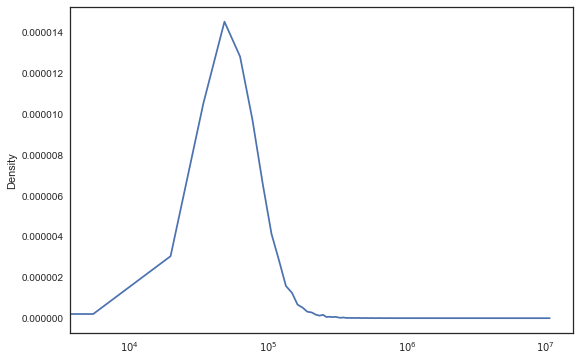

In [135]:
plt.rcParams['figure.figsize'] = (9,6)
st_loans["annual_inc"].plot.density(logx = True)

#### Loan Amount

F:\CreativeSoftware\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


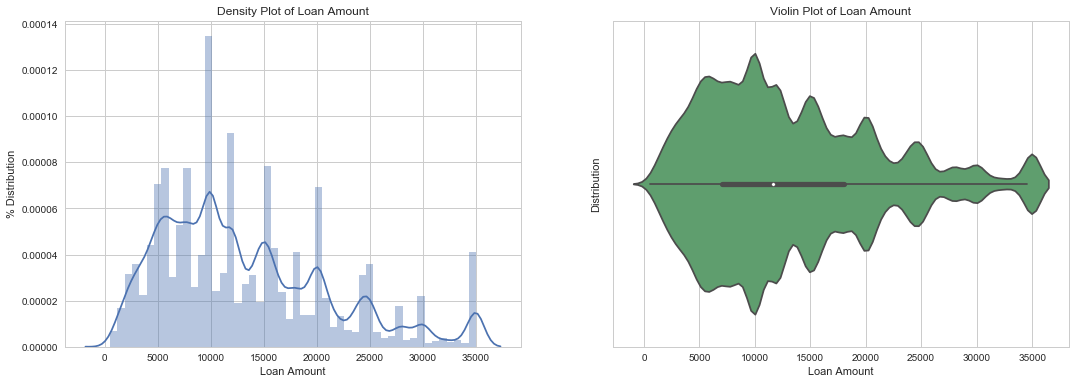

In [136]:
plt.rcParams['figure.figsize'] = (9,9)
sns.set_style("whitegrid")
fig, axs = plt.subplots(1,2,figsize=(18,6))

sns.distplot(st_loans.loan_amnt, ax=axs[0])
axs[0].set(xlabel='Loan Amount', ylabel='% Distribution',title='Density Plot of Loan Amount')

sns.violinplot(st_loans.loan_amnt,color="g", ax=axs[1])
axs[1].set(xlabel='Loan Amount', ylabel='Distribution',title='Violin Plot of Loan Amount')

plt.legend()
plt.show()

#### Loan Purpose

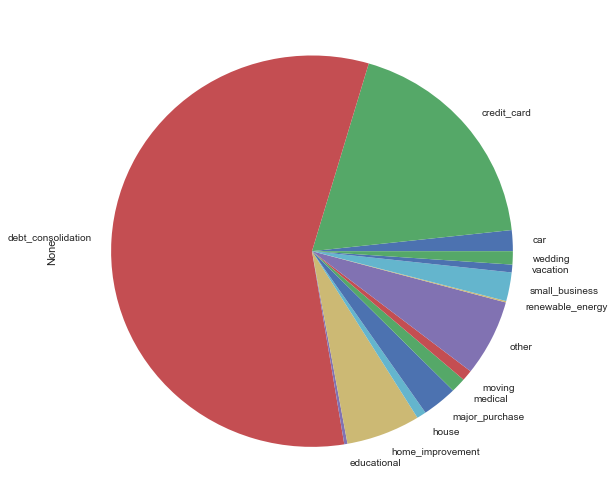

In [137]:
plt.rcParams['figure.figsize'] = (9,9)
st_loans.groupby('purpose').size().plot(kind='pie')

In [138]:
import nltk
import collections as co
l = []
st_loans['purpose'].apply(lambda x: l.append(x))
text = str(l)

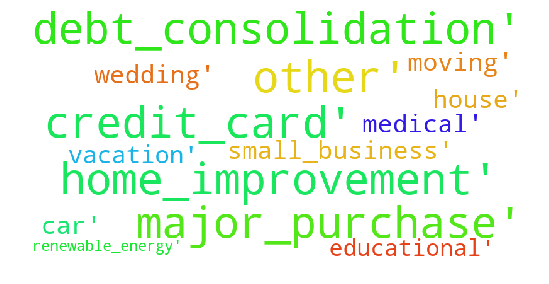

In [139]:
plt.rcParams['figure.figsize'] = (9,6)
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', max_words=120, width=800, height=400).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Loan Interest Rate

F:\CreativeSoftware\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


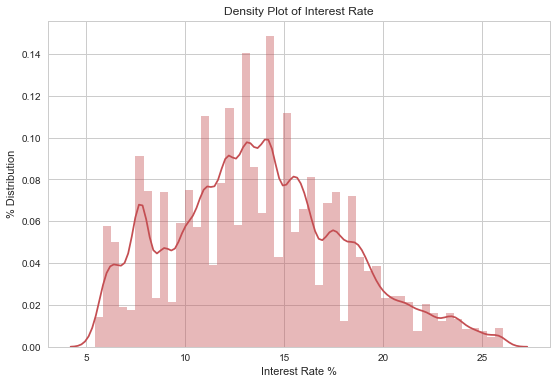

In [140]:
plt.rcParams['figure.figsize'] = (9,6)
ax=sns.distplot(st_only.int_rate, color="r")
ax.set(xlabel='Interest Rate %', 
       ylabel='% Distribution',title='Density Plot of Interest Rate')

plt.legend();

#### Interest Rate/Loan Amount/Purpose/Employment Length/Verification Status/Home Ownership

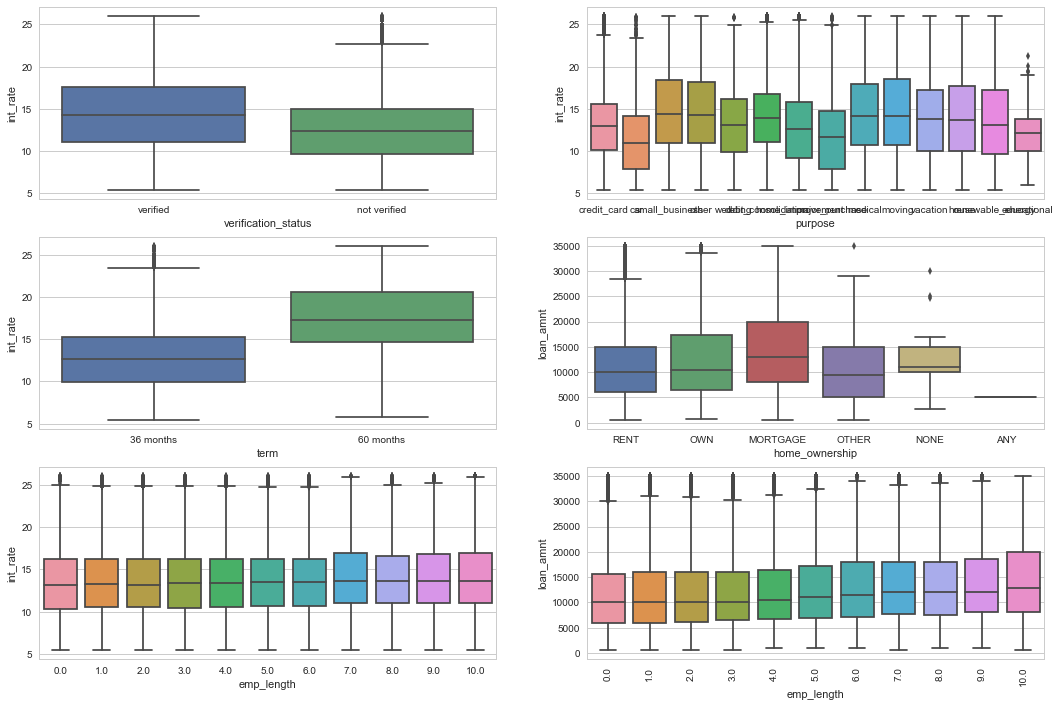

In [141]:
fig, axes = plt.subplots(3, 2, figsize=(18,12))

sns.boxplot(x='verification_status', y='int_rate', data=st_loans, ax=axes[0, 0])
plt.xticks(rotation=90)

sns.boxplot(x='purpose', y='int_rate', data=st_loans, ax=axes[0,1])
plt.xticks(rotation=90)

sns.boxplot(x='term', y='int_rate', data=st_loans, ax=axes[1,0])
plt.xticks(rotation=90)

sns.boxplot(x='home_ownership', y='loan_amnt', data=st_loans, ax=axes[1,1])
plt.xticks(rotation=90)

sns.boxplot(x='emp_length', y='int_rate', data=st_loans, ax=axes[2,0])
plt.xticks(rotation=90)

sns.boxplot(x='emp_length', y='loan_amnt', data=st_loans, ax=axes[2,1])
plt.xticks(rotation=90)

plt.show()

#### Bad Debt by Purpose

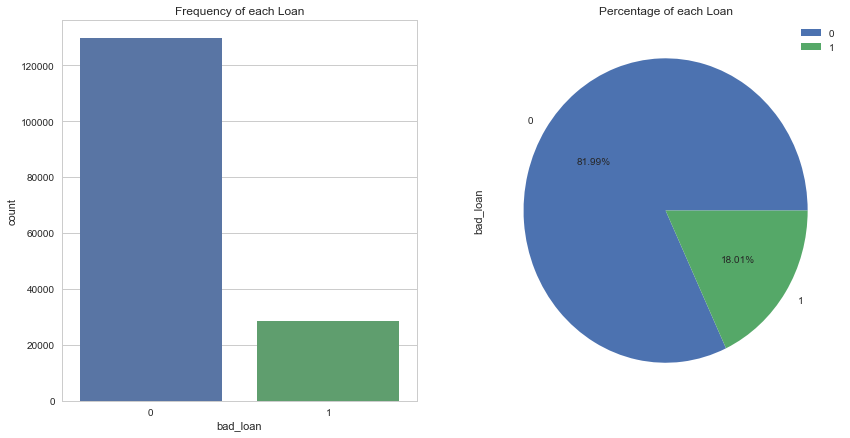

In [142]:
# Among 10 kinds of purposes, we only cares about '0' and '1'
df_sub = st_loans[(st_loans["bad_loan"] == 0) |(st_loans["bad_loan"] == 1)]
filtered_loans = df_sub
fig, axs = plt.subplots(1,2,figsize=(14,7))

sns.countplot(x='bad_loan',data=filtered_loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan")

filtered_loans.bad_loan.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan")

plt.legend();

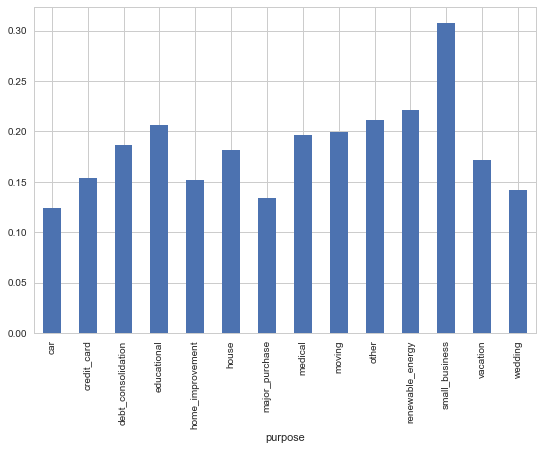

In [143]:
plt.rcParams['figure.figsize'] = (9,6)
purpose_= pd.pivot_table(filtered_loans, index = 'purpose',values = 'bad_loan', aggfunc=[np.sum,len,np.mean])
plt.show(purpose_['mean'].plot(kind = 'bar')) 

#### Group By Class Income

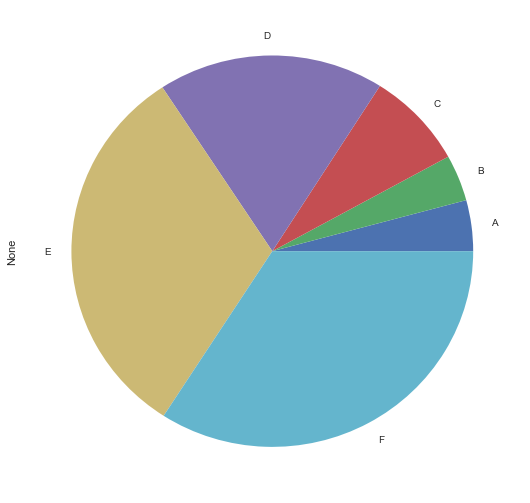

In [144]:
plt.rcParams['figure.figsize'] = (9,9)
def inc_class(num):
    if num <= 50000:
        return 'F'
    elif num <= 75000:
        return 'E'
    elif num <= 100000:
        return 'D'
    elif num <= 125000:
        return 'C'
    elif num <= 150000:
        return 'B'
    else:
        return 'A'

st_loans['inc_class'] = st_loans['annual_inc'].apply(inc_class)
st_loans.groupby('inc_class').size().plot(kind='pie')

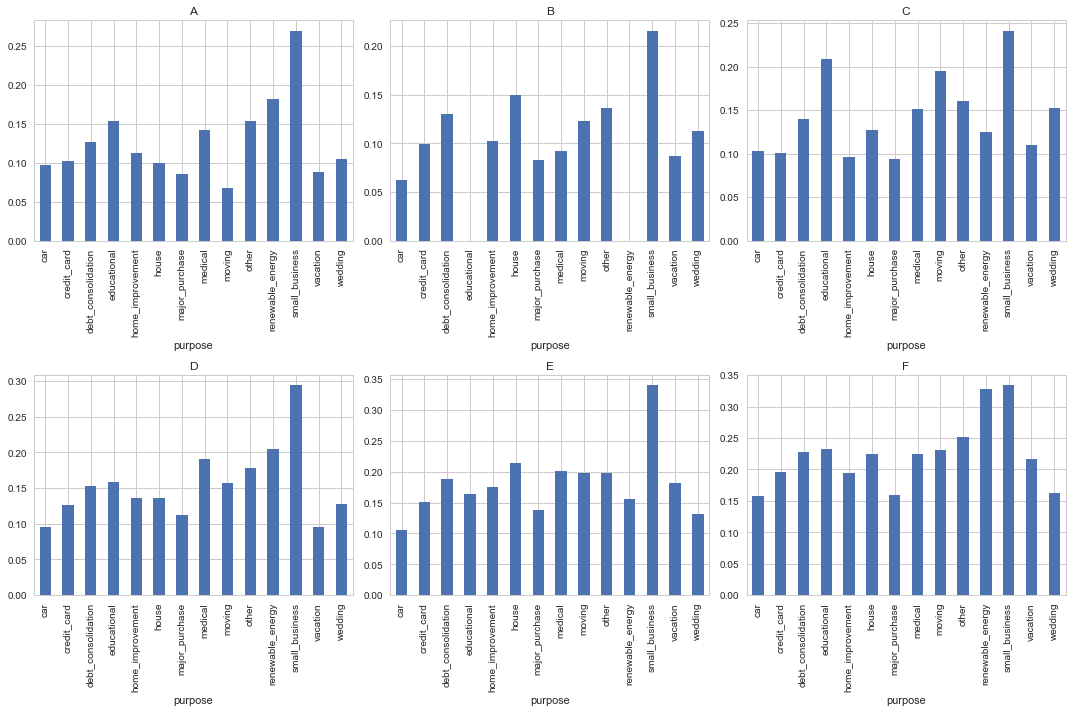

In [145]:
COL_NUM = 3
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,10))

for i,g in enumerate(['A', 'B', 'C', 'D', 'E', 'F']):
    p = pd.pivot_table(st_loans[st_loans['inc_class'] == g], index = 'purpose', values = 'bad_loan', aggfunc=[np.sum,len,np.mean])['mean']
    ax=axes[int(i/COL_NUM), i%COL_NUM]
    p.plot(kind='bar', ax=ax)
    ax.set_title(g)

##axes[1, 1].axis('off')
##axes[1, 2].axis('off')
plt.tight_layout()